In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt("2017EE10938.csv", delimiter=',', skip_header = 1)
data = data[:,1:].flatten()
data

array([32.26809222, 22.97947553, 21.52826543, ..., 39.44089466,
       34.83517001, 38.8323621 ])

In [ ]:
num_bins = 20
print("Frequency Table:")
hist, bins = np.histogram(data, num_bins)
for idx in range(0, num_bins):
  print("{} - {} = {}".format(bins[idx], bins[idx+1], hist[idx]))
print("\n")

Frequency Table:
20.0067180488259 - 21.006297637708524 = 267
21.006297637708524 - 22.00587722659115 = 240
22.00587722659115 - 23.005456815473774 = 263
23.005456815473774 - 24.0050364043564 = 247
24.0050364043564 - 25.004615993239025 = 245
25.004615993239025 - 26.004195582121646 = 262
26.004195582121646 - 27.00377517100427 = 229
27.00377517100427 - 28.003354759886896 = 236
28.003354759886896 - 29.00293434876952 = 259
29.00293434876952 - 30.002513937652147 = 248
30.002513937652147 - 31.00209352653477 = 253
31.00209352653477 - 32.0016731154174 = 248
32.0016731154174 - 33.00125270430002 = 279
33.00125270430002 - 34.00083229318265 = 229
34.00083229318265 - 35.00041188206527 = 273
35.00041188206527 - 35.9999914709479 = 242
35.9999914709479 - 36.99957105983052 = 240
36.99957105983052 - 37.99915064871315 = 255
37.99915064871315 - 38.99873023759577 = 247
38.99873023759577 - 39.9983098264784 = 238




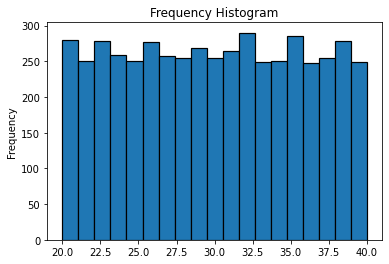

In [ ]:
plt.hist(data.ravel(), edgecolor='black', linewidth=1.2, bins=np.linspace(np.min(data), np.max(data), num=num_bins)) 
plt.title("Frequency Histogram")
plt.ylabel("Frequency")
plt.show()

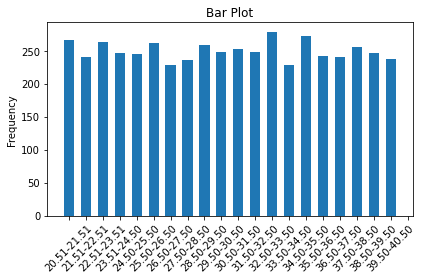

In [ ]:
plt.hist(data, num_bins, histtype='bar', rwidth=0.6)
plt.title("Bar Plot")
plt.ylabel("Frequency")
hist, bins = np.histogram(data, num_bins)
bins = bins + ((bins[1]-bins[0])/2)
labels = ['']*num_bins
for idx in range(0, num_bins):
  labels[idx] = '{:.2f}-{:.2f}'.format(bins[idx], bins[idx+1])

plt.xticks(bins, labels, rotation=45)
plt.tight_layout()

Text(0, 0.5, 'Value')

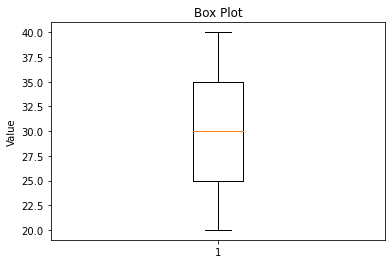

In [ ]:
plt.boxplot(data)
plt.title("Box Plot")
plt.ylabel("Value")

In [ ]:
# 4
q75, q25 = np.percentile(data,[75, 25])
print("Mean                     : {}".format(np.mean(data)))
print("Median                   : {}".format(np.median(data)))
print("Coefficient of variation : {}".format(st.variation(data)))
print("Coefficient of skewness  : {}".format(st.skew(data)))
print("Coefficient of kurtosis  : {}".format(st.kurtosis(data)))
print("Inter-quartile range     : {}".format(q75 - q25))

Mean                     : 29.961941007654183
Median                   : 30.03107342636215
Coefficient of variation : 0.19244327654487922
Coefficient of skewness  : -0.005006017850751467
Coefficient of kurtosis  : -1.1958813543047515
Inter-quartile range     : 9.964354203548297


In [ ]:
# 4 e,f
print("Kurtosis is", st.kurtosis(data), "; Skewness is", st.skew(data), "; Variation is", st.variation(data))

Kurtosis is -1.1958813543047515 ; Skewness is -0.005006017850751467 ; Variation is 0.19244327654487922


In [ ]:
# 5
distributions = [st.laplace, st.norm]
mles = []

for distribution in distributions:
    pars = distribution.fit(data)
    mle = distribution.nnlf(pars, data)
    mles.append(mle)

results = [(distribution.name, mle) for distribution, mle in zip(distributions, mles)]
best_fit = sorted(zip(distributions, mles), key=lambda d: d[1])[0]
print ('Best fit reached using {}, MLE value: {}'.format(best_fit[0].name, best_fit[1]))

Best fit reached using norm, MLE value: 15854.563202079422
